## Mi primer red Neuronal utilizando Python y el modulo Tensorflow.

In [58]:
import tensorflow as tf
import numpy as np

In [49]:
celcius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [59]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

print('comenzando entrenamiento....')
historial = modelo.fit(celcius, fahrenheit, epochs=1000, verbose=False)
print('modelo entrenado')

comenzando entrenamiento....
modelo entrenado


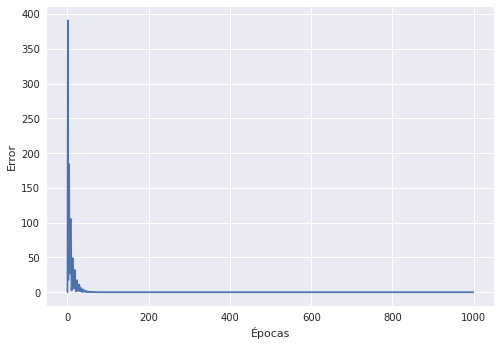

In [60]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.plot(historial.history['loss'])


In [63]:
print('predicciones')
result = modelo.predict([100.0])
print('El resultado es: ', result, 'grados Fahrenheit')

predicciones
El resultado es:  [[211.7474]] grados Fahrenheit


In [64]:
print('variables internas del modelo')
# print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

variables internas del modelo
[array([[-0.15505163,  0.04157787,  0.52313936]], dtype=float32), array([-3.1986535, -2.0887485,  4.0358596], dtype=float32)]
[array([[ 0.52608675, -0.10629202,  0.8323536 ],
       [ 0.03893468,  1.326316  ,  0.07911101],
       [-1.5733187 ,  0.15245719, -0.828722  ]], dtype=float32), array([-3.6245513 , -0.42925072, -3.9589703 ], dtype=float32)]
[array([[-1.0503719 ],
       [-0.07567034],
       [-1.5392315 ]], dtype=float32), array([3.8587697], dtype=float32)]
